In [1]:
#Представление данных
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv( "METAB_training_disguised.csv")
print(data.head())

  MOLECULE    Act  D_36  D_37  D_38  D_39  D_41  D_42  D_43  D_44  ...  \
0   M_5058  70.00     0     0     0     0     0     0     0     0  ...   
1   M_6406  74.68     0     0     0     0     0     0     0     0  ...   
2  M_12634   2.00     0     0     0     0     0     0     0     0  ...   
3  M_17594   0.00     0     0     0     0     0     0     0     0  ...   
4  M_17627  73.00     0     0     0     0     0     0     0     0  ...   

   D_10736  D_10737  D_10738  D_10740  D_10741  D_10743  D_10744  D_10745  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   D_10746  D_10763  
0        0        0  
1        0        0  
2        0        0  
3   

In [3]:
# Описание данных
data.describe()

,Act,D_36,D_37,D_38,D_39,D_41,D_42,D_43,D_44,D_45,...,D_10736,D_10737,D_10738,D_10740,D_10741,D_10743,D_10744,D_10745,D_10746,D_10763
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,...,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,46.204765,0.001275,0.011472,0.001275,0.001912,0.000637,0.000637,0.006373,0.003824,0.000637,...,0.001275,0.002549,0.002549,0.000637,0.001275,0.000637,0.007011,0.000637,0.000637,0.001275
std,36.061884,0.035692,0.185222,0.050492,0.043699,0.025246,0.025246,0.100814,0.061741,0.025246,...,0.035692,0.050443,0.050443,0.025246,0.035692,0.025246,0.083463,0.025246,0.025246,0.035692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111.600000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
import torch

print("CUDA доступен:", torch.cuda.is_available())
print("Количество доступных GPU:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Имя GPU:", torch.cuda.get_device_name(0))


CUDA доступен: False
Количество доступных GPU: 0


In [5]:
print("Shape of dataframe : ", data.shape)
data.info()

Shape of dataframe :  (1569, 4374)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Columns: 4374 entries, MOLECULE to D_10763
dtypes: float64(1), int64(4372), object(1)
memory usage: 52.4+ MB


In [7]:
# Проверка пропущенных значений
data.isnull().sum()

MOLECULE    0
Act         0
D_36        0
D_37        0
D_38        0
           ..
D_10743     0
D_10744     0
D_10745     0
D_10746     0
D_10763     0
Length: 4374, dtype: int64

In [3]:
# Исключение нечисловых столбцов
non_numeric_columns = data.select_dtypes(include=['object']).columns
df = data.drop(non_numeric_columns, axis=1)

In [5]:
# Количество строк и столбцов после исключения нечисловых значений
df.shape

(1569, 4373)

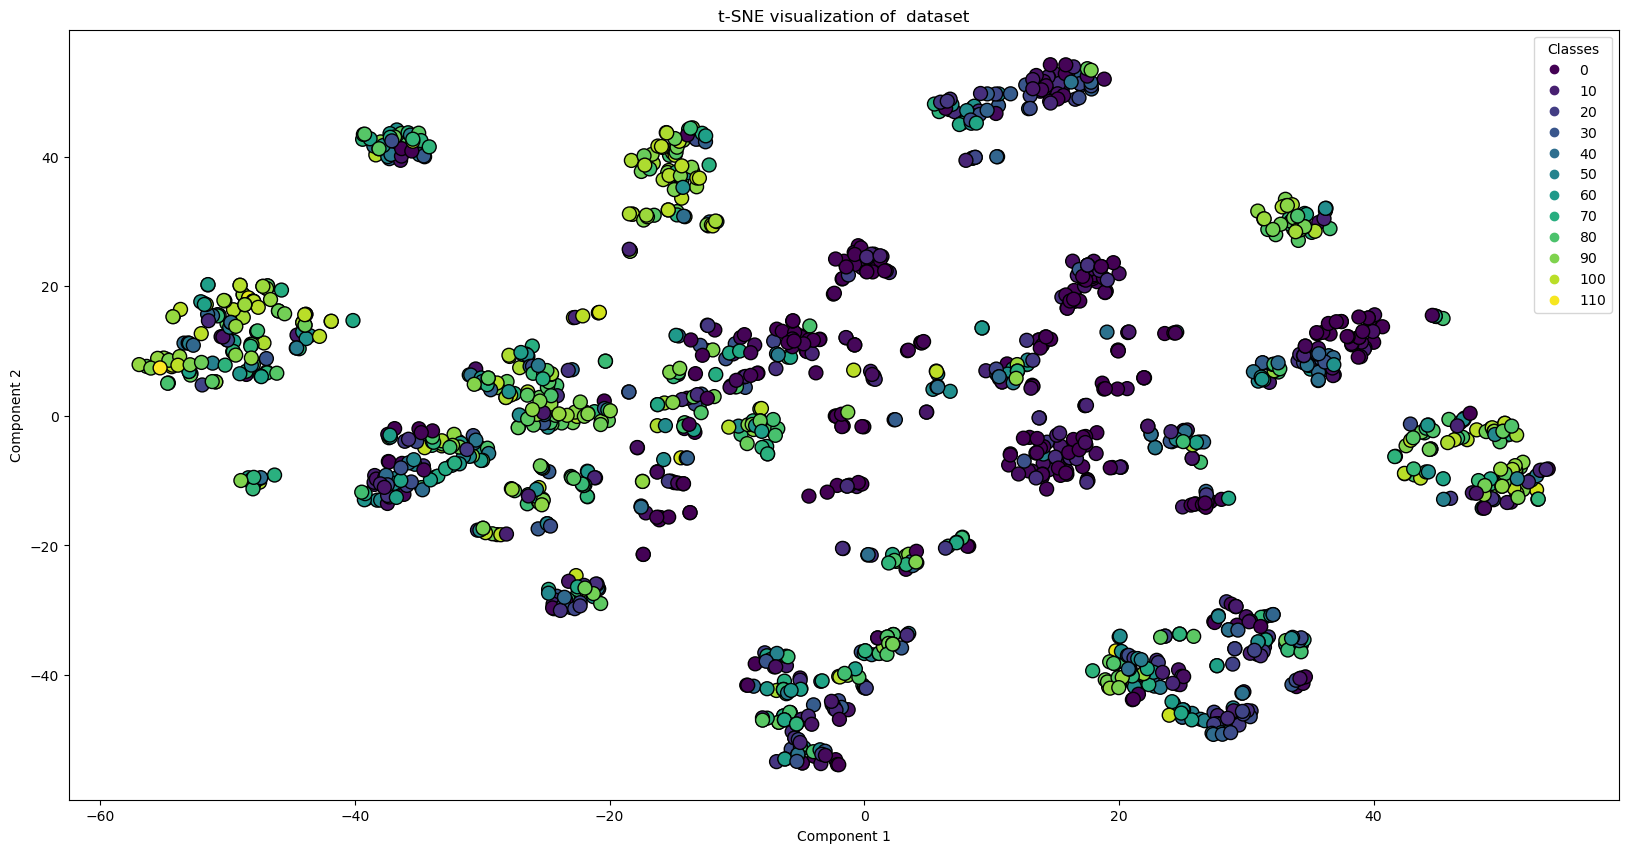

In [125]:
# График рассеяния t-SNE
import warnings
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
# Инициализация t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Применение t-SNE к данным
X_tsne = tsne.fit_transform(X)

# Визуализация с помощью seaborn
plt.figure(figsize=(20, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('t-SNE visualization of  dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

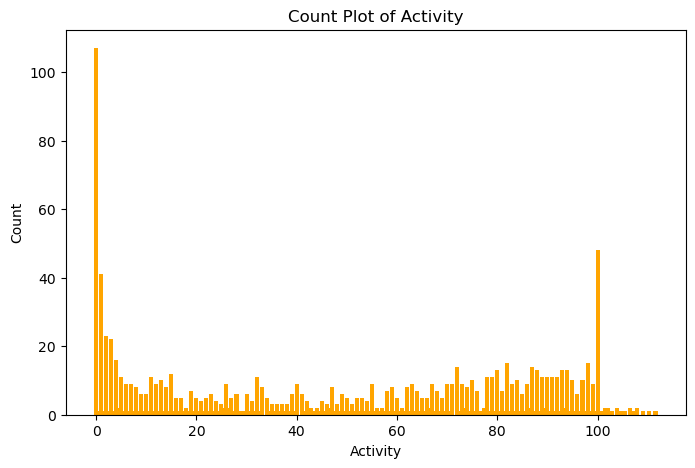

In [47]:
#График для количества значений, соответствующих определенной активности

activity_value_counts = df['Act'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(activity_value_counts.index, activity_value_counts, color='orange')
plt.title('Count Plot of Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


In [126]:
# Нормализация данных
standard_scaler = StandardScaler()
df_standard_scaled = standard_scaler.fit_transform(df)

In [128]:
print(df.head())

     Act  D_36  D_37  D_38  D_39  D_41  D_42  D_43  D_44  D_45  ...  D_10736  \
0  70.00     0     0     0     0     0     0     0     0     0  ...        0   
1  74.68     0     0     0     0     0     0     0     0     0  ...        0   
2   2.00     0     0     0     0     0     0     0     0     0  ...        0   
3   0.00     0     0     0     0     0     0     0     0     0  ...        0   
4  73.00     0     0     0     0     0     0     0     0     0  ...        0   

   D_10737  D_10738  D_10740  D_10741  D_10743  D_10744  D_10745  D_10746  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   D_10763  
0        0  
1        0  
2        0  
3   

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
MAE: 0.14570767305734436
R²: 0.9999352216709442
MSE: 0.0912853515488276


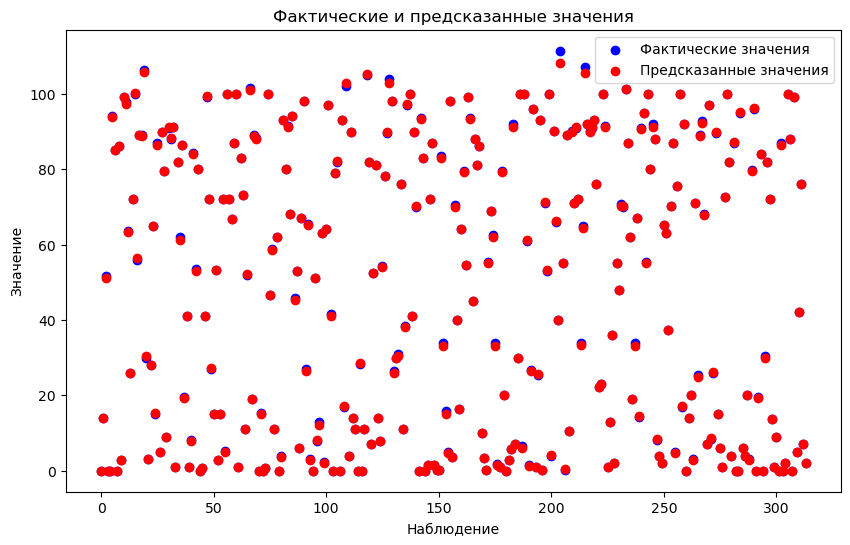

In [130]:
# XGBoost Regressor c подбором параметров
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Определение модели
model = XGBRegressor()

# Определение параметров для подбора
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Использование лучших параметров для обучения модели
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'MSE: {mse}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


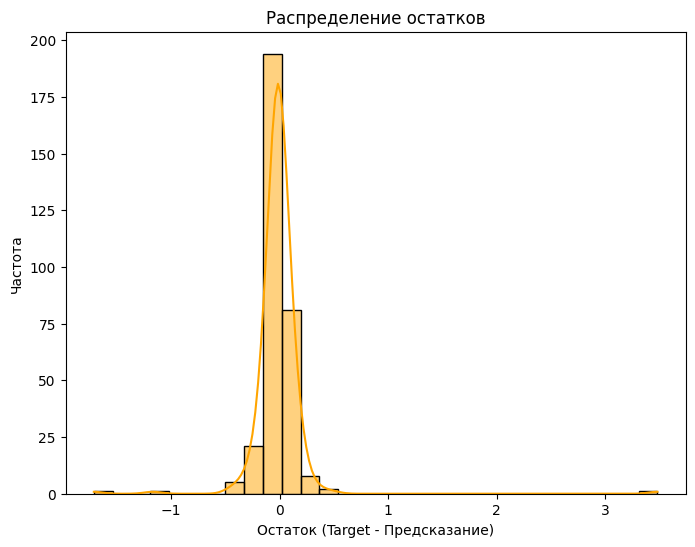

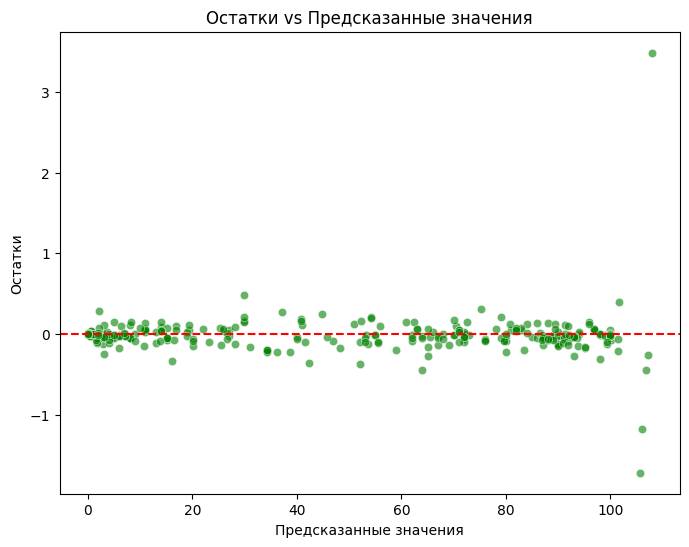

In [21]:
# График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

# 14. Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()


MAE: 0.096429653104992
MSE: 0.06499025510018563
R²: 0.9999538813176608


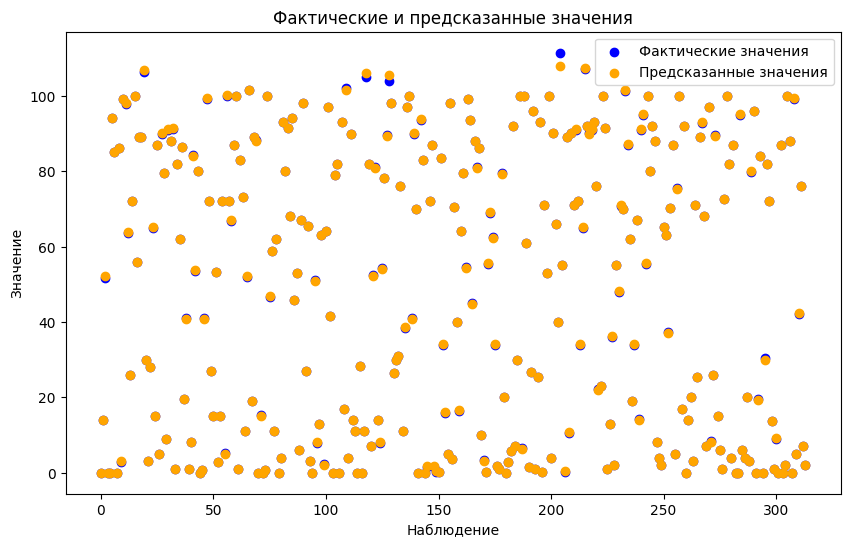

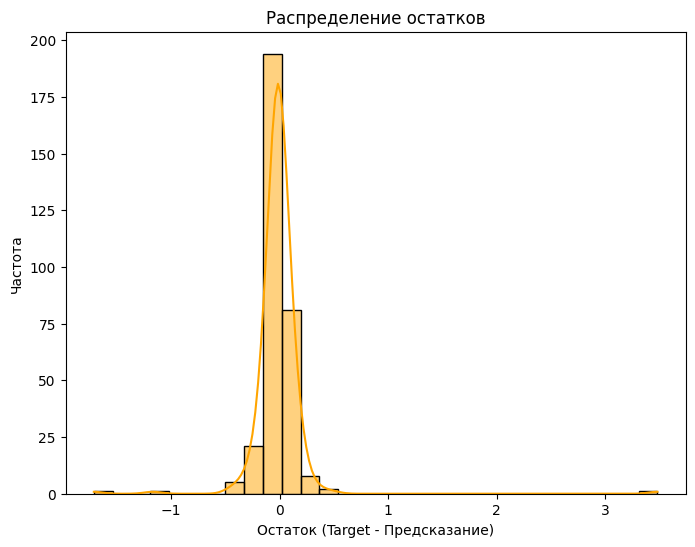

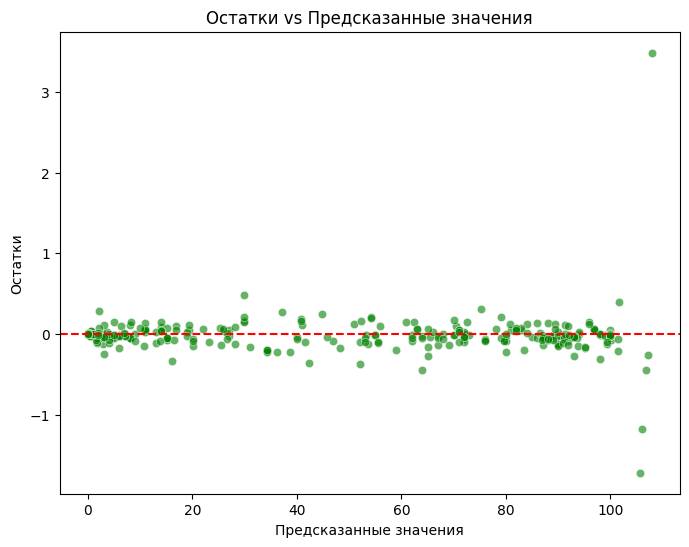

In [23]:
#Random Forest Regressor c подбором параметров
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Определение и обучение модели
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rf.predict(X_test)

# Оценка производительности модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='orange', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

#График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

#  Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11176
[LightGBM] [Info] Number of data points in the train set: 1255, number of used features: 2093
[LightGBM] [Info] Start training from score 45.562713
MAE: 0.17809273457184246
MSE: 0.3221985108185801
R²: 0.9997713600177798


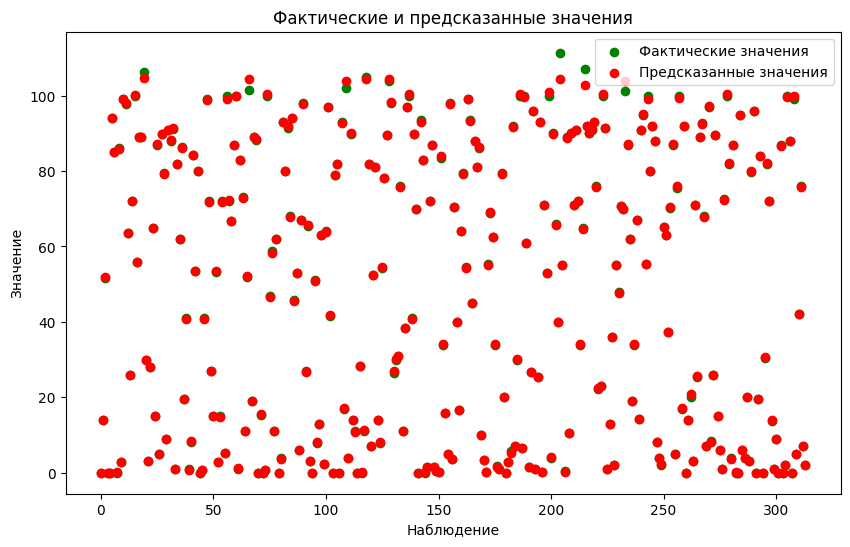

In [29]:
#LGBM без подбора параметров
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Создание и обучение модели LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lgbm.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='green', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Mean Absolute Error: 16.3731210025737
Mean Squared Error: 456.5259181746757
R^2 Score: 0.6760379880424678


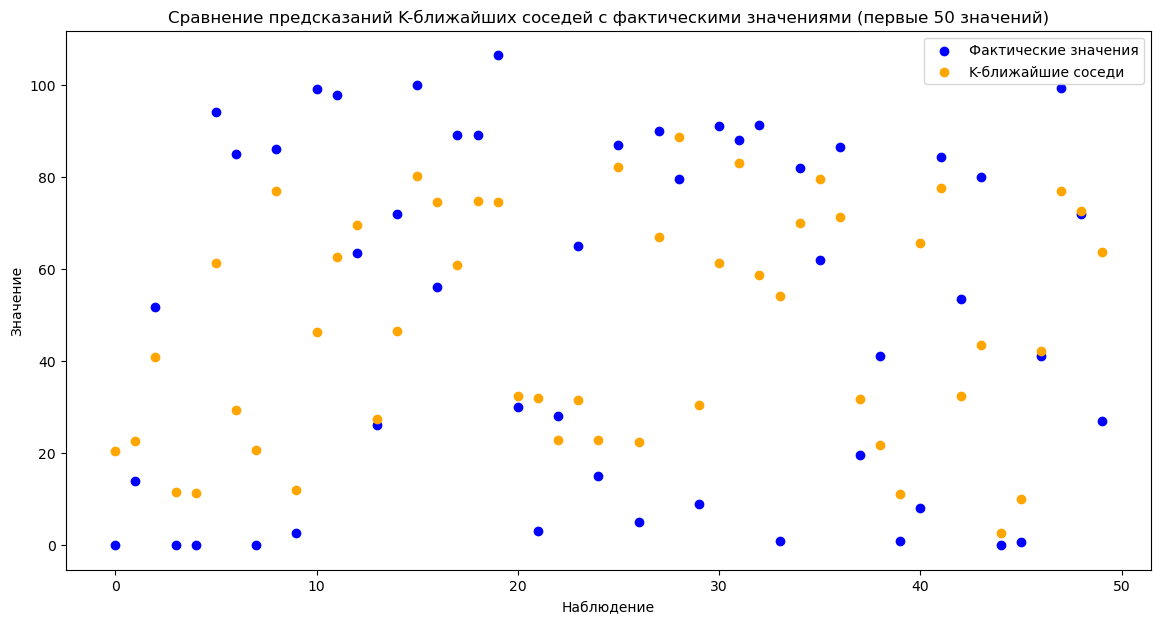

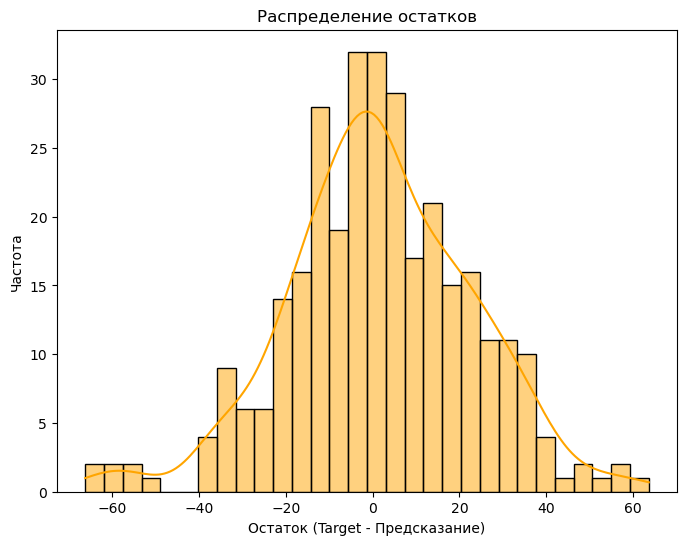

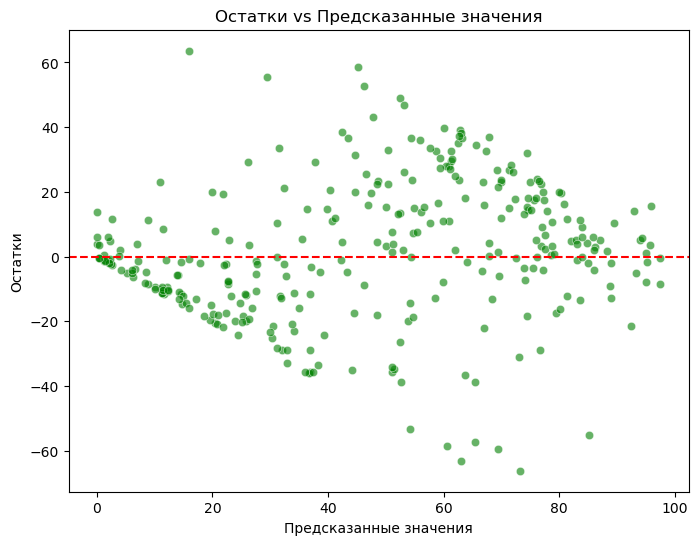

In [133]:
# KNN c подбором параметров

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель K-ближайших соседей
knn = KNeighborsRegressor(n_neighbors=5) 


# Параметры для подбора
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Оценка производительности модели
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Визуализация предсказаний K-ближайших соседей и фактических значений 
plt.figure(figsize=(14, 7))

plt.scatter(range(50), y_test[:50], label='Фактические значения', color='blue')
plt.scatter(range(50), y_pred[:50], label='K-ближайшие соседи', color='orange')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний K-ближайших соседей с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()

#График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

#  Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Лучшие параметры: {'alpha': 0.5, 'l1_ratio': 0.1}
Mean Absolute Error: 17.433864622091704
Mean Squared Error: 479.0379982297342
R^2 Score: 0.660062862737106


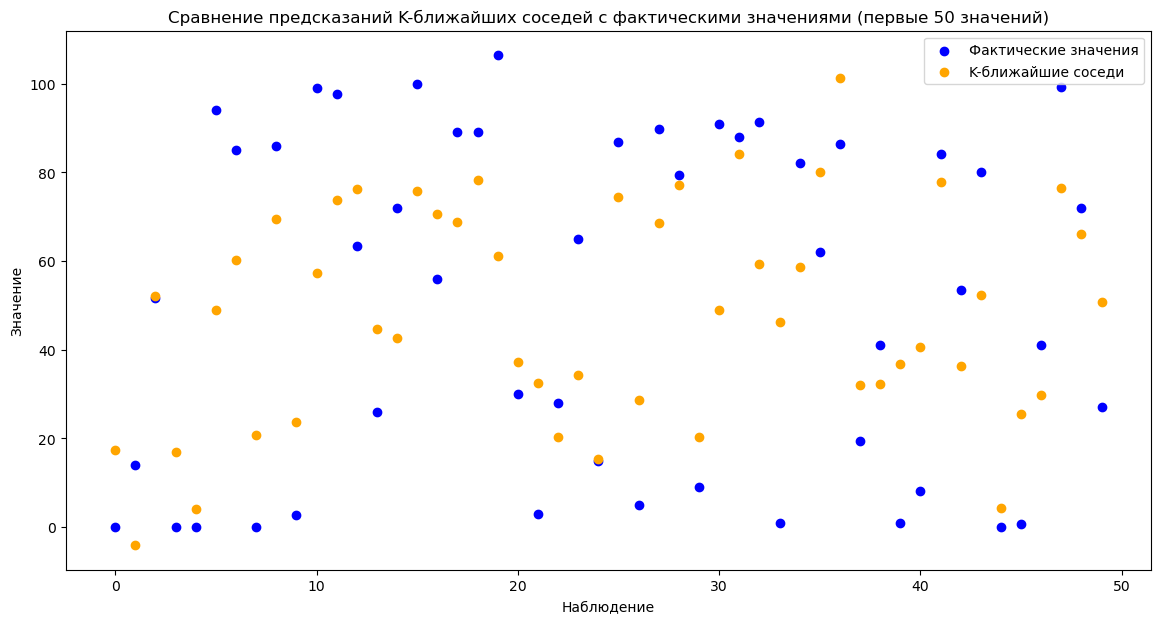

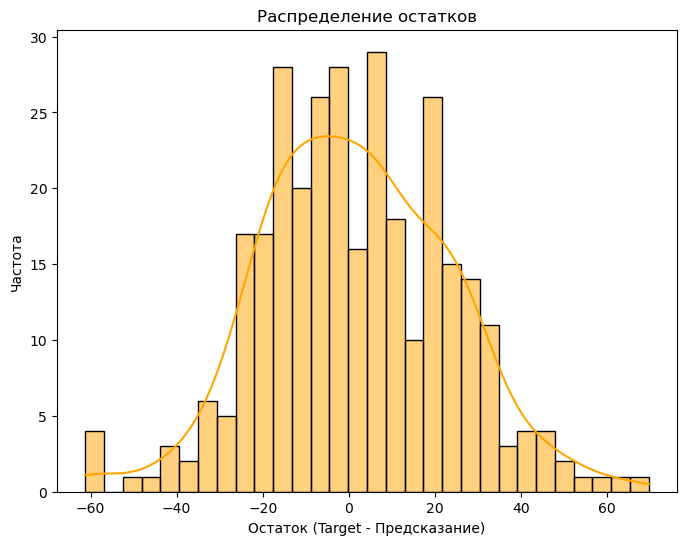

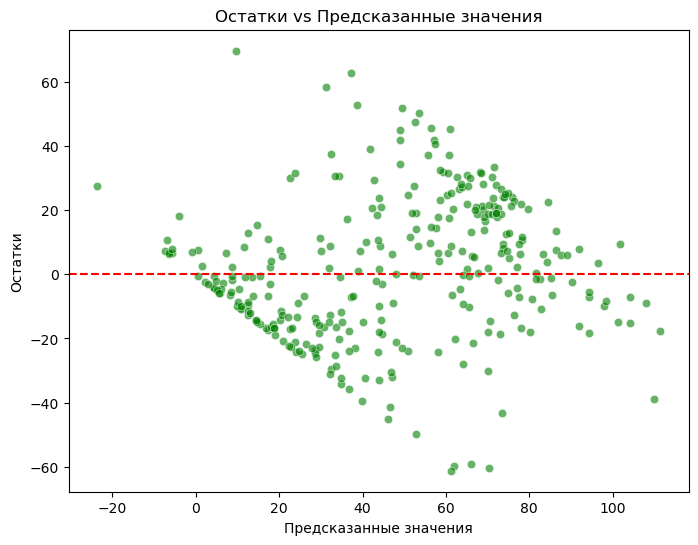

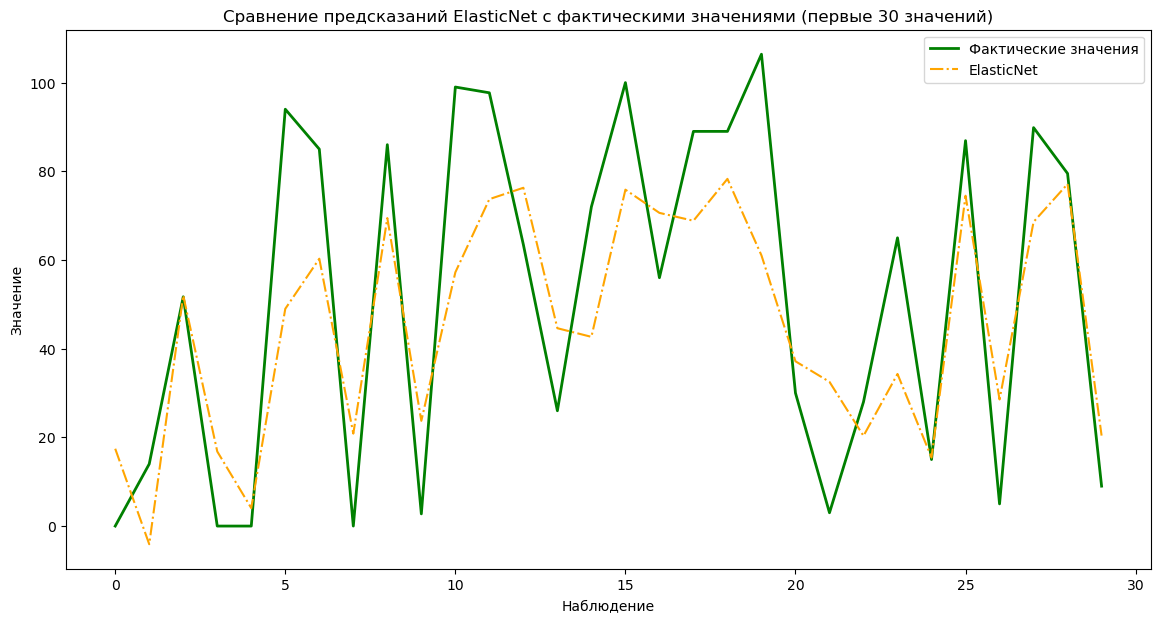

In [135]:
# Elastic Net c подбором параметров
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель ElasticNet
elastic_net = ElasticNet()

# Параметры для подбора
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Регуляризационный параметр
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Соотношение L1/L2
}

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Обучение модели
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print(f'Лучшие параметры: {best_params}')

# Оценка производительности модели
best_elastic_net = grid_search.best_estimator_
y_pred = best_elastic_net.predict(X_test)

mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Визуализация предсказаний  и фактических значений 
plt.figure(figsize=(14, 7))

plt.scatter(range(50), y_test[:50], label='Фактические значения', color='blue')
plt.scatter(range(50), y_pred[:50], label='K-ближайшие соседи', color='orange')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний K-ближайших соседей с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()

#График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

#  Остатки и предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

# Визуализация предсказаний и фактических значений (первые 30 значений)
plt.figure(figsize=(14, 7))
plt.plot(range(30), y_test.iloc[:30], label='Фактические значения', color='green', linewidth=2)
plt.plot(range(30), y_pred[:30], label='ElasticNet', color='orange', linestyle='-.')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний ElasticNet с фактическими значениями (первые 30 значений)')
plt.legend()
plt.show()

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 43.1024 - val_loss: 23.9390
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.1553 - val_loss: 18.7528
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.5466 - val_loss: 17.5022
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1519 - val_loss: 17.9981
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5024 - val_loss: 17.8199
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1085 - val_loss: 16.9985
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1671 - val_loss: 17.7247
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1512 - val_loss: 17.1342
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9493 - val_loss: 17.2648
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4822 - val_loss: 16.4861
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4889 - val_loss: 16.6355
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

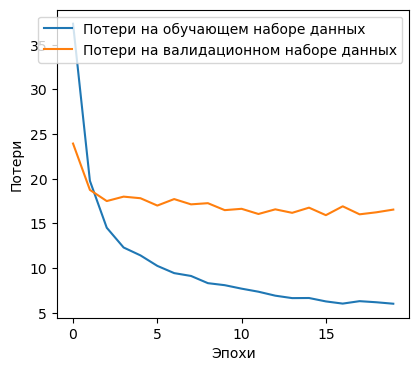

In [127]:
# Fully Connected Neural Network (FCNN)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Входной слой
    layers.Dense(64, activation='relu'),  # Скрытый слой
    layers.Dense(1)  # Выходной слой 
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_absolute_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оценка модели на тестовых данных
test_loss = model.evaluate(X_test, y_test)
print(f'Средняя ошибка на валидационном наборе данных: {test_loss}')


# Визуализация результатов обучения модели
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающем наборе данных')
plt.plot(history.history['val_loss'], label='Потери на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1861.6117 - mae: 35.0100 - val_loss: 1036.3475 - val_mae: 27.2044
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 826.9587 - mae: 24.1778 - val_loss: 827.5142 - val_mae: 22.7540
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 622.3062 - mae: 20.1698 - val_loss: 641.9735 - val_mae: 20.0956
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 474.2397 - mae: 17.1654 - val_loss: 554.7176 - val_mae: 18.4538
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 420.1335 - mae: 15.9535 - val_loss: 514.3466 - val_mae: 17.3767
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 338.5288 - mae: 14.1952 - val_loss: 492.5725 - val_mae: 16.6430
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 327.6177 - mae: 13.7944 - val_loss: 503.4602 - val_mae: 16.6532
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 308.6613 - mae: 12.8482 - val_loss: 464.2541 - val_mae: 15.8542
Epoch 9/20
40/40 ━━━━

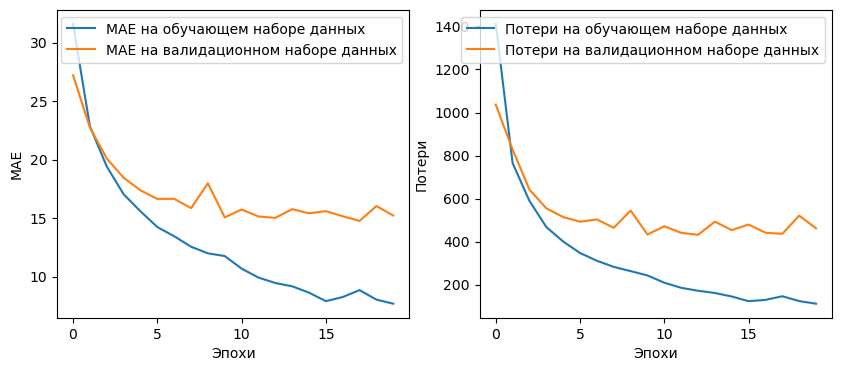

In [137]:
# CNN model

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Определение целевой переменной 
X = df.drop('Act', axis=1)  # Признаки
y = df['Act']  # Целевая переменная

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели нейронной сети
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Используем количество признаков из обучающего набора
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Один выход для задачи регрессии
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Используем MSE для регрессии
              metrics=['mae'])  #  MAE как метрика

# Обучение модели
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val))  

# Оценка производительности модели на валидационном наборе данных
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=2)
print("\nСредняя абсолютная ошибка на валидационном наборе данных:", val_mae)

# Визуализация результатов обучения
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE на обучающем наборе данных')
plt.plot(history.history['val_mae'], label='MAE на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающем наборе данных')
plt.plot(history.history['val_loss'], label='Потери на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()




Epoch 1/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2983.5728 - mae: 42.7824 - val_loss: 2576.2078 - val_mae: 40.3636
Epoch 2/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2337.3357 - mae: 38.2952 - val_loss: 1920.8853 - val_mae: 36.6789
Epoch 3/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1649.1854 - mae: 33.9293 - val_loss: 1475.5305 - val_mae: 33.8264
Epoch 4/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1461.1406 - mae: 34.0298 - val_loss: 1320.4244 - val_mae: 32.6844
Epoch 5/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1289.1702 - mae: 32.4882 - val_loss: 1291.9204 - val_mae: 32.3219
Epoch 6/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1247.3224 - mae: 32.0490 - val_loss: 1274.6328 - val_mae: 32.0811
Epoch 7/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1222.8811 - mae: 31.4310 - val_loss: 1251.2247 - val_mae: 31.7601
Epoch 8/22
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1207.6096 - mae: 31.4293 - val_loss: 1241.0918 - val_mae: 31.4770
Epoch 9

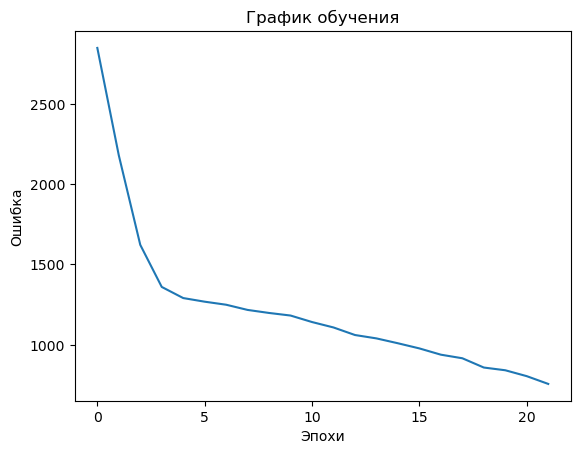

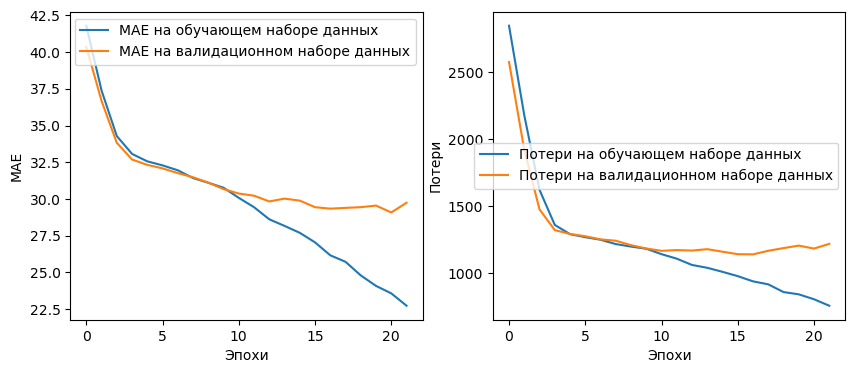

In [143]:
# Простая RNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Определение целевой переменной 
X = df.drop('Act', axis=1).values  # Признаки 
y = df['Act'].values  # Целевая переменная 

# Изменение формы входных данных для RNN
timesteps = 10
features = X.shape[1]

# Создание последовательностей для RNN
X_seq = []
y_seq = []

for i in range(len(X) - timesteps):
    X_seq.append(X[i:i + timesteps])
    y_seq.append(y[i + timesteps])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Создание модели RNN
model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(timesteps, features)),  # Используем стандартный RNN слой
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Один выход для задачи регрессии
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='mean_squared_error', 
              metrics=['mae'])  

# Обучение модели
history = model.fit(X_train, y_train, epochs=22,
                    validation_data=(X_val, y_val))  # Используем валидационный набор

# Оценка производительности модели на валидационном наборе данных
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=2)
print("\nСредняя абсолютная ошибка на валидационном наборе данных:", val_mae)

# Визуализация обучения
plt.plot(history.history['loss'])
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График обучения')
plt.show()

# Визуализация результатов обучения
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE на обучающем наборе данных')
plt.plot(history.history['val_mae'], label='MAE на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающем наборе данных')
plt.plot(history.history['val_loss'], label='Потери на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 1703.0100 - mae: 35.5444 - val_loss: 1385.7654 - val_mae: 33.0645
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1270.6079 - mae: 31.5189 - val_loss: 1344.4597 - val_mae: 32.5484
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1194.3287 - mae: 30.7039 - val_loss: 1361.3234 - val_mae: 32.3483
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1302.9178 - mae: 32.0990 - val_loss: 1260.5466 - val_mae: 31.6039
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1170.1569 - mae: 30.3987 - val_loss: 1325.2491 - val_mae: 31.2524
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1079.9783 - mae: 29.0254 - val_loss: 1166.6178 - val_mae: 30.1245
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 977.4762 - mae: 27.1370 - val_loss: 1308.3180 - val_mae: 30.6692
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 948.8127 - mae: 26.2581 - val_loss: 1197.3148 - val_mae: 29.8533
Ep

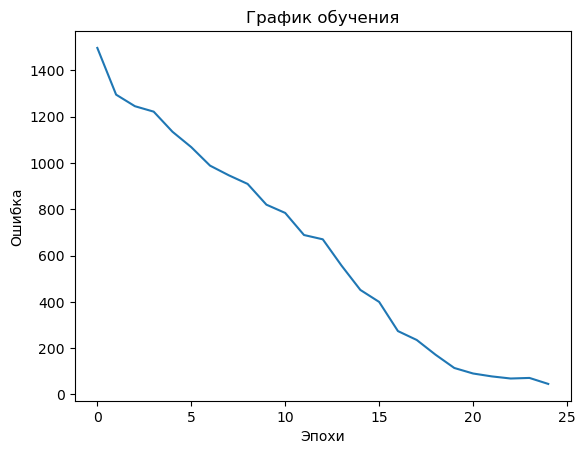

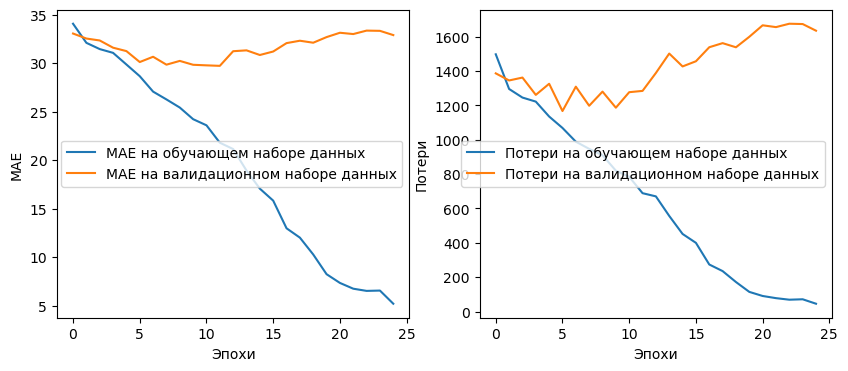

In [145]:
#RNN (с использованием LTSM)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


# Определение целевой переменной 
X = df.drop('Act', axis=1).values  # Признаки 
y = df['Act'].values  # Целевая переменная 

# Изменение формы входных данных для RNN
timesteps = 10
features = X.shape[1]

# Создание последовательностей для RNN
X_seq = []
y_seq = []

for i in range(len(X) - timesteps):
    X_seq.append(X[i:i + timesteps])
    y_seq.append(y[i + timesteps])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Создание модели RNN с использованием LSTM
model = models.Sequential([
    layers.LSTM(128, activation='relu', input_shape=(timesteps, features)),  
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Один выход для задачи регрессии
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='mean_squared_error', 
              metrics=['mae']) 

# Обучение модели
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_val, y_val))  # Используем валидационный набор

# Оценка производительности модели на валидационном наборе данных
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=2)
print("\nСредняя абсолютная ошибка на валидационном наборе данных:", val_mae)

# Визуализация обучения
plt.plot(history.history['loss'])
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График обучения')
plt.show()

# Визуализация результатов обучения
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE на обучающем наборе данных')
plt.plot(history.history['val_mae'], label='MAE на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающем наборе данных')
plt.plot(history.history['val_loss'], label='Потери на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

Epoch 1/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 2021.8772 - mae: 37.2481 - val_loss: 1318.7235 - val_mae: 32.3618
Epoch 2/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1245.4564 - mae: 31.5132 - val_loss: 1268.9333 - val_mae: 31.5886
Epoch 3/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1165.5710 - mae: 30.3733 - val_loss: 1201.3109 - val_mae: 30.7270
Epoch 4/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1113.2311 - mae: 29.5886 - val_loss: 1231.3214 - val_mae: 30.6764
Epoch 5/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1008.6795 - mae: 27.7070 - val_loss: 1172.9406 - val_mae: 29.7811
Epoch 6/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 836.8891 - mae: 24.4552 - val_loss: 1399.5205 - val_mae: 31.9009
Epoch 7/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 885.3383 - mae: 24.6637 - val_loss: 1256.5343 - val_mae: 30.2346
Epoch 8/35
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 726.4343 - mae: 22.5190 - val_loss: 1382.7726 - val_mae: 31.3934
Epo

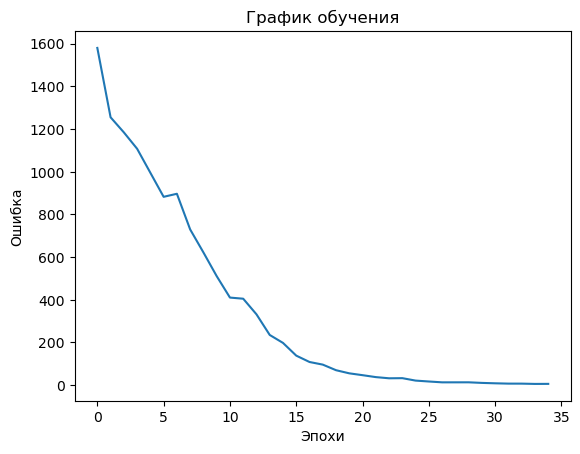

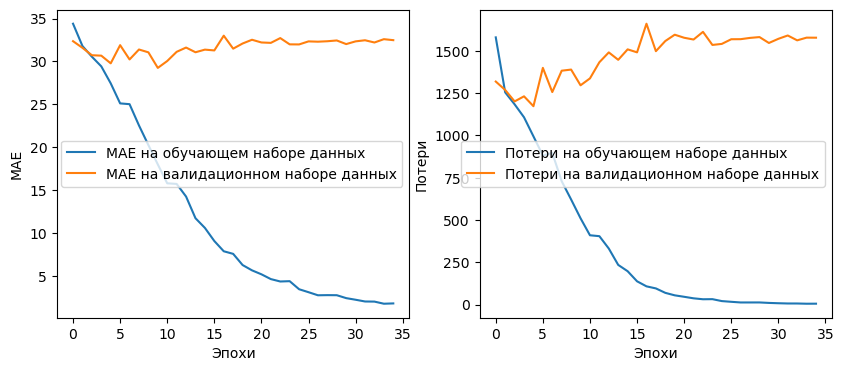

In [147]:
# RNN ( c использованием GRU)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Предполагается, что df — это ваш DataFrame с данными
# Определение целевой переменной 
X = df.drop('Act', axis=1).values  # Признаки в виде numpy массива
y = df['Act'].values  # Целевая переменная в виде numpy массива

# Изменение формы входных данных для RNN
# Например, если у вас 10 временных шагов и 1 признак
timesteps = 10
features = X.shape[1]

# Создание последовательностей для RNN
X_seq = []
y_seq = []

for i in range(len(X) - timesteps):
    X_seq.append(X[i:i + timesteps])
    y_seq.append(y[i + timesteps])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Создание модели RNN с использованием GRU
model = models.Sequential([
    layers.GRU(128, activation='relu', input_shape=(timesteps, features)),  # Входная форма: (timesteps, features)
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Один выход для задачи регрессии
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Используем MSE для регрессии
              metrics=['mae'])  # Можно использовать MAE как метрику

# Обучение модели
history = model.fit(X_train, y_train, epochs=35,
                    validation_data=(X_val, y_val))  # Используем валидационный набор

# Оценка производительности модели на валидационном наборе данных
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=2)
print("\nСредняя абсолютная ошибка на валидационном наборе данных:", val_mae)

# Визуализация обучения
plt.plot(history.history['loss'])
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График обучения')
plt.show()

# Визуализация результатов обучения
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE на обучающем наборе данных')
plt.plot(history.history['val_mae'], label='MAE на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающем наборе данных')
plt.plot(history.history['val_loss'], label='Потери на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()


Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 2935.4707 - mae: 42.4420 - val_loss: 2375.1167 - val_mae: 39.2096
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2155.8022 - mae: 37.7710 - val_loss: 1734.9431 - val_mae: 35.5308
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1583.9502 - mae: 34.0311 - val_loss: 1400.8680 - val_mae: 33.3408
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1335.3115 - mae: 32.8055 - val_loss: 1318.0681 - val_mae: 32.7235
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1300.9110 - mae: 32.8007 - val_loss: 1314.2151 - val_mae: 32.6664
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1270.7722 - mae: 32.4002 - val_loss: 1311.2135 - val_mae: 32.6110
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1326.7150 - mae: 33.1409 - val_loss: 1313.4662 - val_mae: 32.6554
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1353.6575 - mae: 33.4760 - val_loss: 1311.9290 - val_mae: 32.6278


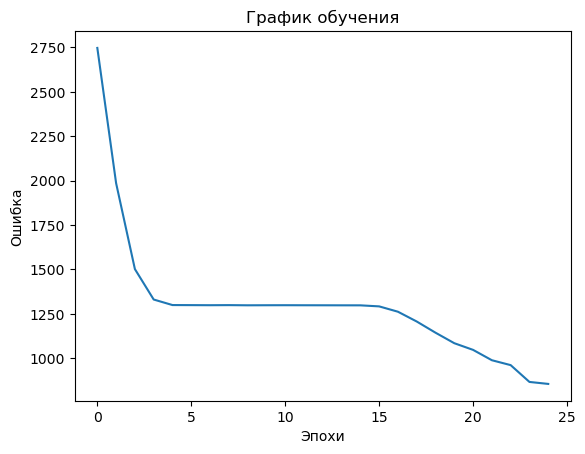

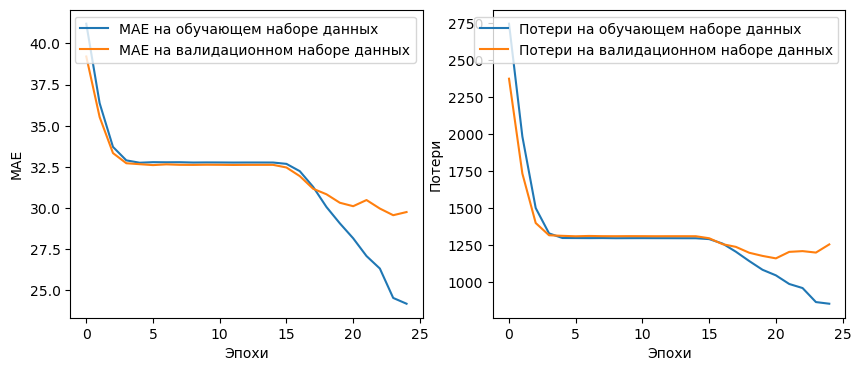

In [149]:
# RNN ( c использованием LTSM и GRU)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Предполагается, что df — это ваш DataFrame с данными
# Определение целевой переменной 
X = df.drop('Act', axis=1).values  # Признаки 
y = df['Act'].values  # Целевая переменная 

# Изменение формы входных данных для RNN
timesteps = 10
features = X.shape[1]

# Создание последовательностей для RNN
X_seq = []
y_seq = []

for i in range(len(X) - timesteps):
    X_seq.append(X[i:i + timesteps])
    y_seq.append(y[i + timesteps])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Создание модели RNN с использованием LSTM и GRU
model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(timesteps, features)),  # Первый слой LSTM
    layers.GRU(64),  # Второй слой GRU
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Один выход для задачи регрессии
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Используем MSE для регрессии
              metrics=['mae'])  # Можно использовать MAE как метрику

# Обучение модели
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_val, y_val))  # Используем валидационный набор

# Оценка производительности модели на валидационном наборе данных
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=2)
print("\nСредняя абсолютная ошибка на валидационном наборе данных:", val_mae)


# Визуализация обучения
plt.plot(history.history['loss'])
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График обучения')
plt.show()

# Визуализация результатов обучения
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE на обучающем наборе данных')
plt.plot(history.history['val_mae'], label='MAE на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающем наборе данных')
plt.plot(history.history['val_loss'], label='Потери на валидационном наборе данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()
